In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv


In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [138]:
df=pd.read_csv('/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv')

In [139]:
df.head(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46


In [140]:
df.set_index('index',inplace=True)

In [141]:
df.shape

(1340, 10)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 115.2+ KB


#`columns Types`
>`numeric`- PatientID ,age , bmi , bloodpressure,children,claim

>`category`-gender,diabetic,smoker

>`mixed`-region

#`univariate analysis`

#age
`conclusion`
- age is  normally(allmost) distributed.
- age column have no outliers.
- but it has some missing values.

In [143]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

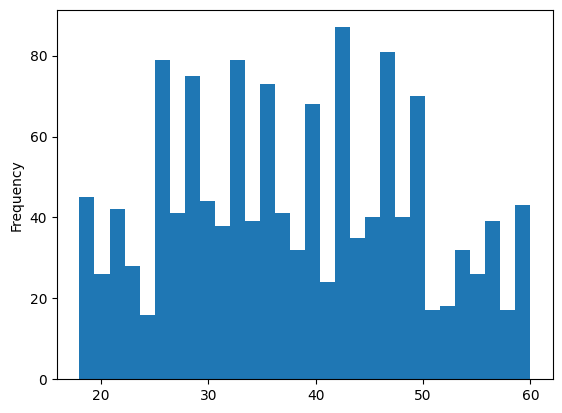

In [144]:
df['age'].plot(kind='hist',bins=30)

<Axes: ylabel='Density'>

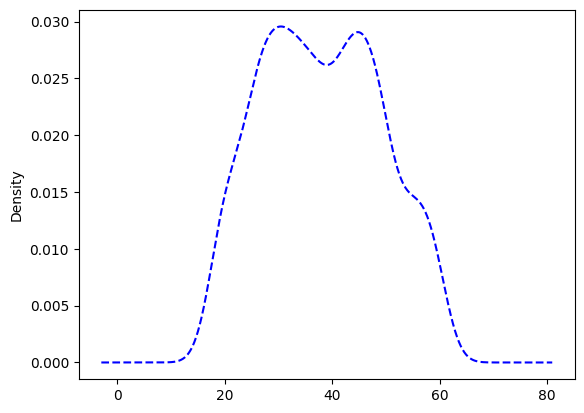

In [145]:
df['age'].plot(kind='kde',color='blue',linestyle='--')

In [146]:
df['age'].skew()

0.11361133741072633

In [262]:
df['age'].skew()

0.11361133741072633

<Axes: >

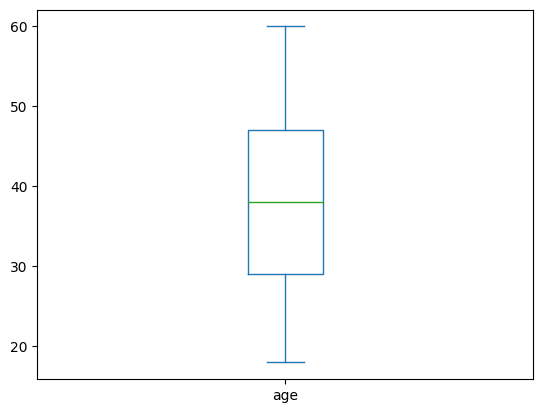

In [147]:
df['age'].plot(kind='box')

<Axes: >

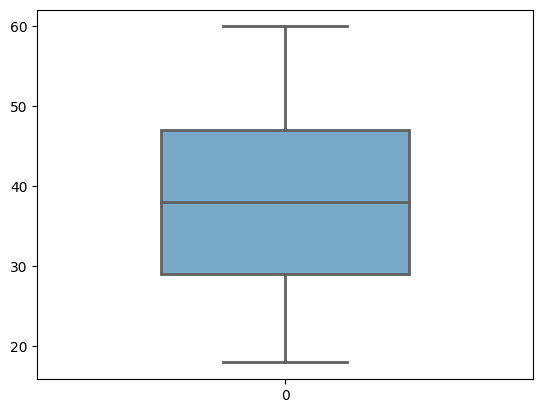

In [148]:
sns.boxplot(df.age,palette='Blues',width=0.5,linewidth=2)

#BMI

 - bmi columns have outliers

- its close to normal distribution 
- bmi columns is very critical in diabeticdata

In [149]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<Axes: ylabel='Frequency'>

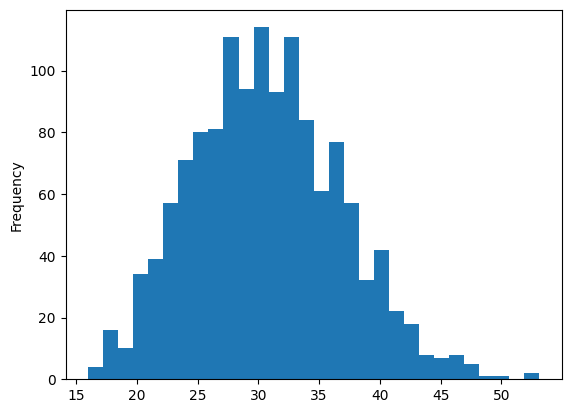

In [211]:
df['bmi'].plot(kind='hist',bins=30)

<Axes: ylabel='Density'>

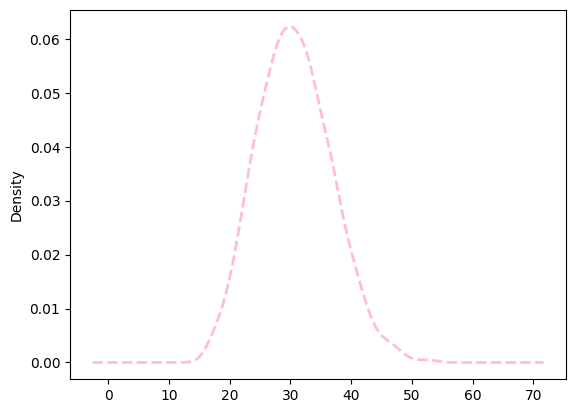

In [151]:
df['bmi'].plot(kind='kde',color='pink',linewidth=2,linestyle='--')

In [152]:
df['bmi'].skew()

0.28597245020808587

<Axes: >

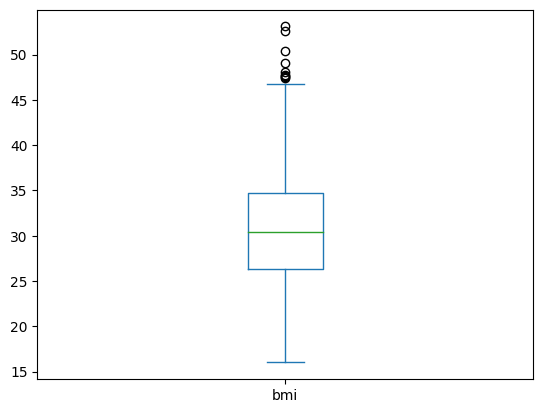

In [153]:
df['bmi'].plot(kind='box')

<Axes: >

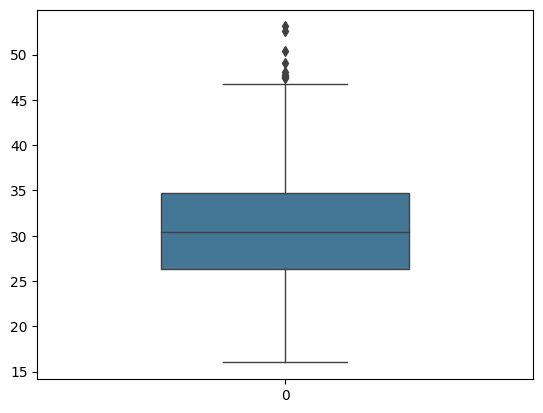

In [154]:
sns.boxplot(df.bmi,palette='mako',width=0.5,linewidth=1)

In [155]:
df[df['bmi']>47]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,,
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
579,580,25.0,male,47.5,84,Yes,1,No,southeast,8083.92
675,676,49.0,female,48.1,81,Yes,2,No,northeast,9432.93
696,697,49.0,male,47.7,88,No,1,No,southeast,9748.91
802,803,42.0,male,49.1,109,Yes,0,No,southeast,11381.33
1299,1300,50.0,male,52.6,110,No,1,Yes,southeast,44501.40
1306,1307,43.0,female,47.6,112,Yes,2,Yes,southwest,46113.51
1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


#bloodpressure
-`conclusion`

- bloodpressure column is skewed(positively)
- bloodpressure  is skewed distributed
- bloodpressure have outliers

In [156]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<Axes: ylabel='Frequency'>

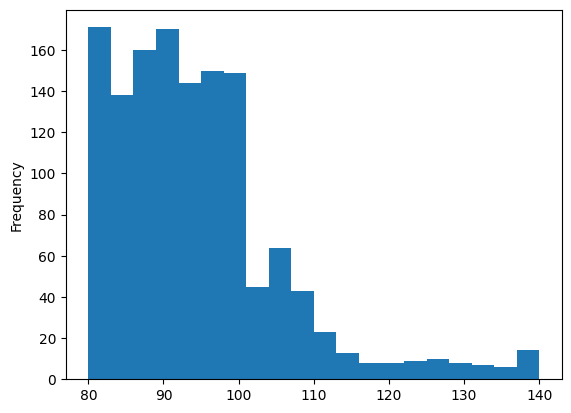

In [157]:
df['bloodpressure'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

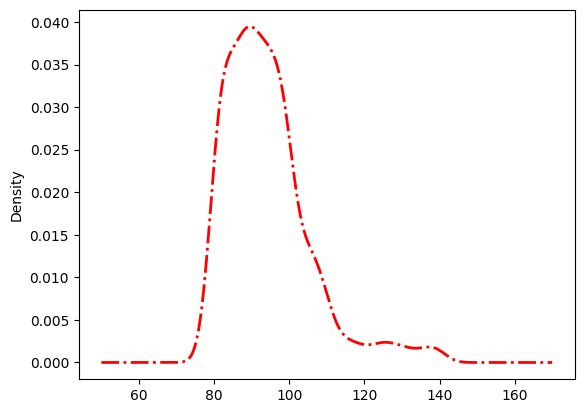

In [158]:
df['bloodpressure'].plot(kind='kde',color='red',linestyle='-.',linewidth=2)

In [159]:
df['bloodpressure'].skew()

1.4835342102293079

<Axes: >

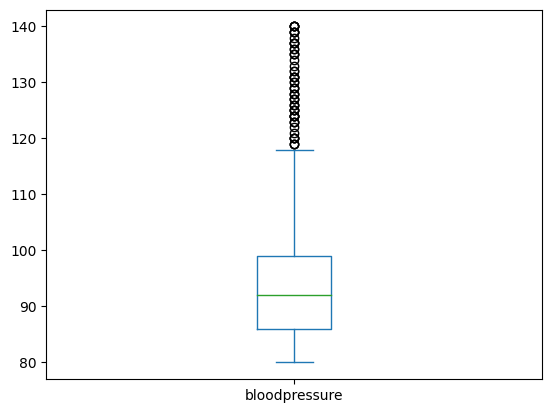

In [160]:
df['bloodpressure'].plot(kind='box')

<Axes: >

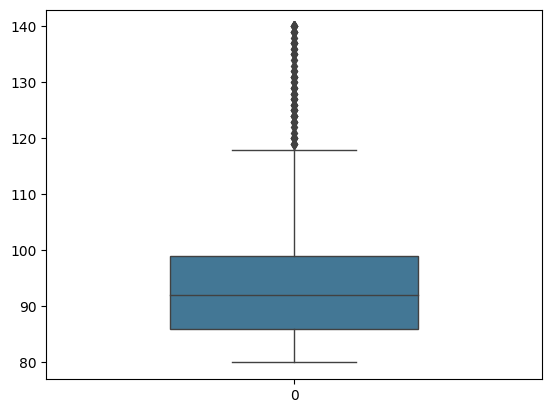

In [161]:
sns.boxplot(df['bloodpressure'],palette='mako',width=0.5,linewidth=1)

In [162]:
df[df['bloodpressure']>120]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,,
1147,1148,29.0,female,32.7,128,Yes,2,No,northwest,26018.95
1150,1151,55.0,female,27.1,135,No,1,No,southwest,26140.36
1152,1153,38.0,female,35.9,128,No,1,No,northeast,26392.26
1153,1154,43.0,male,36.8,126,No,2,No,northwest,26467.10
1154,1155,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51
1156,1157,46.0,female,23.0,137,Yes,0,Yes,southeast,27037.91
1161,1162,22.0,male,22.4,137,Yes,2,No,northeast,27375.90
1166,1167,23.0,male,26.7,123,Yes,0,Yes,northeast,28101.33
1169,1170,27.0,male,36.7,130,No,1,No,northwest,28468.92


#claim
-`conclusion`

-claim column skewed(positively) and shape is skewed distributed

-also have ouliers

In [163]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

<Axes: ylabel='Frequency'>

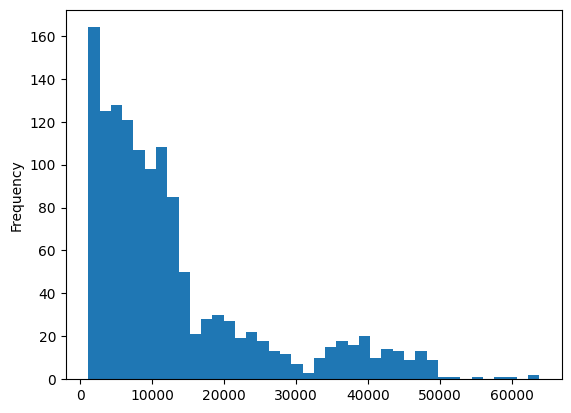

In [164]:
df['claim'].plot(kind='hist',bins=40)

<Axes: ylabel='Density'>

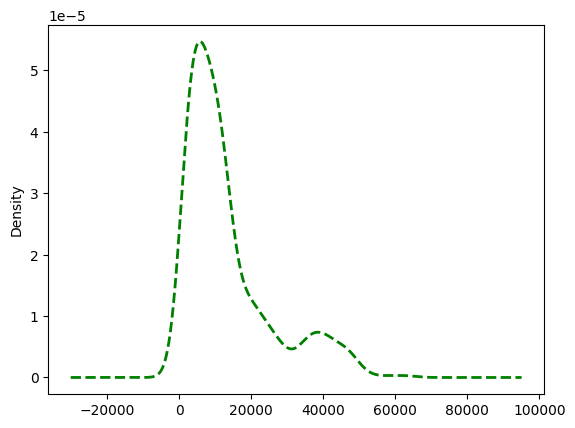

In [165]:
df['claim'].plot(kind='kde',color='green',linestyle='--',linewidth=2)

In [166]:
df['claim'].skew()

1.5167468509489237

<Axes: >

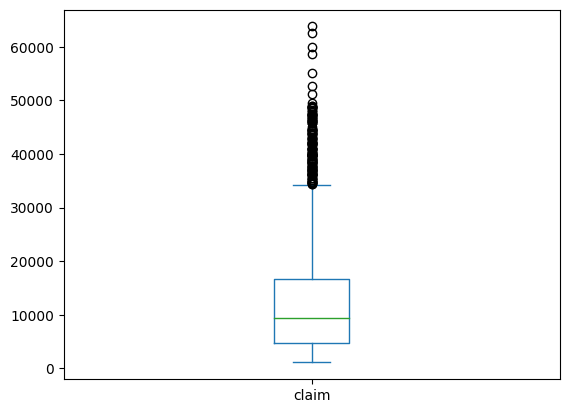

In [167]:
df['claim'].plot(kind='box')

#gender
-`conclusion

-no of male and female is nearly same

In [168]:
df['gender'].value_counts()

gender
male      678
female    662
Name: count, dtype: int64

<Axes: xlabel='gender'>

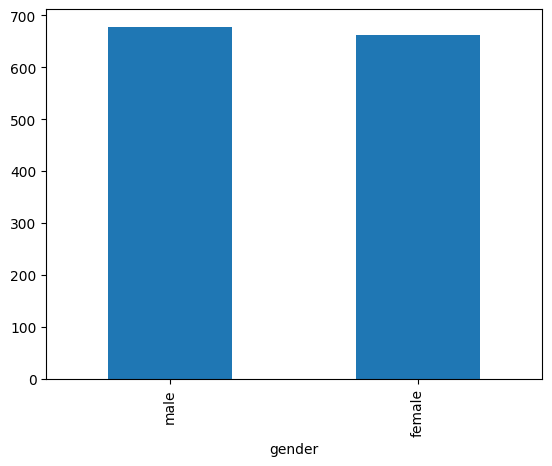

In [169]:
df['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

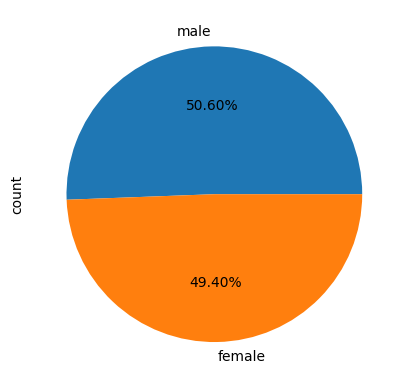

In [170]:
df['gender'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [171]:
df['gender'].isnull().sum()

0

#diabetic
-near about 50% of peaple have diabetes.(regarding this data only)

In [172]:
df['diabetic'].value_counts()

diabetic
No     698
Yes    642
Name: count, dtype: int64

<Axes: xlabel='diabetic'>

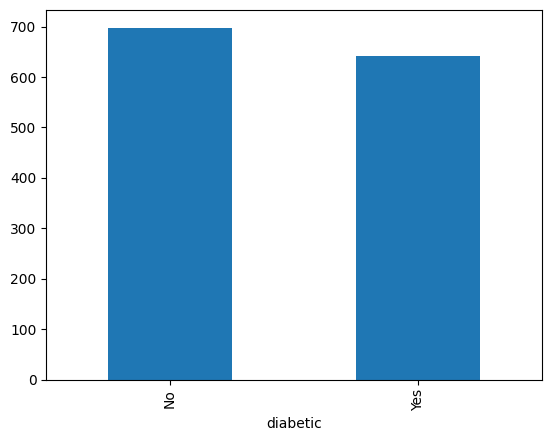

In [173]:
df['diabetic'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

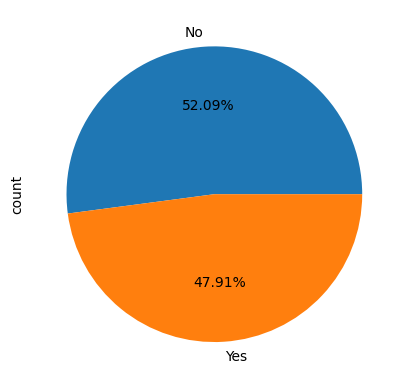

In [174]:
df['diabetic'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [175]:
df['diabetic'].isnull().sum()

0

#smokers

-`conclusion`

-%80 of peaple are  non-smoker

In [176]:
df['smoker'].value_counts()

smoker
No     1066
Yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

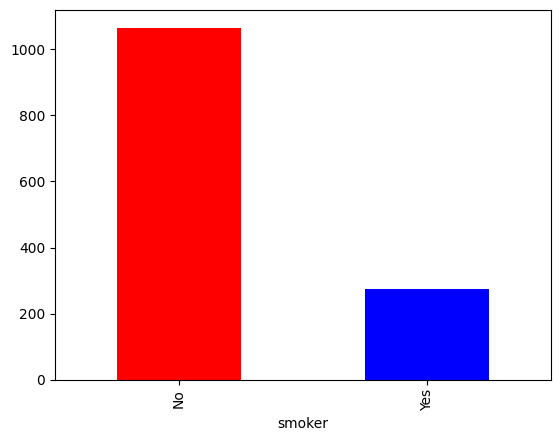

In [177]:
colours=['red','blue']
df['smoker'].value_counts().plot(kind='bar',color=colours)

<Axes: ylabel='count'>

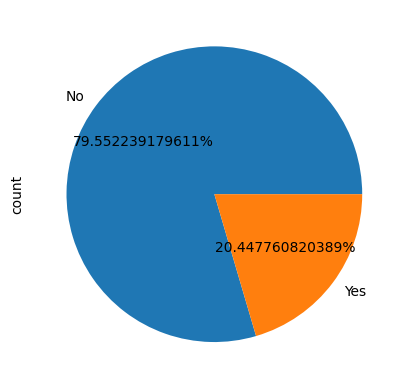

In [178]:
df['smoker'].value_counts().plot(kind='pie',autopct='%.12f%%')

In [179]:
df['smoker'].isnull().sum()

0

# `bivariate analysis`

# claim vs age

/tmp/ipykernel_33/1530964731.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='age', ylabel='claim'>

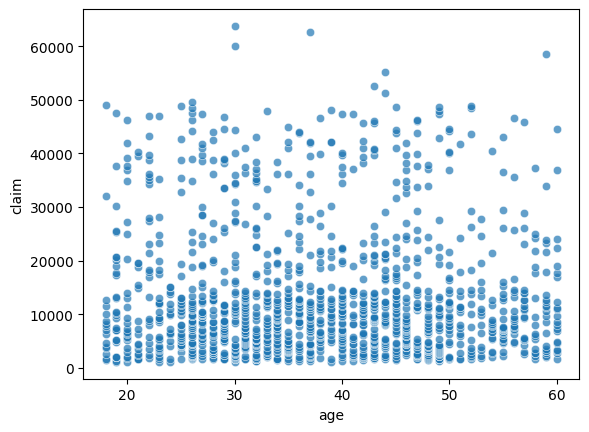

In [180]:
sns.scatterplot(y=df.claim,x=df.age,alpha=0.7 ,palette='mako',marker='o')

In [ ]:
sns.lmplot(data=df,x='age',y='claim',scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'})

# claim vs gender

<Axes: xlabel='gender', ylabel='claim'>

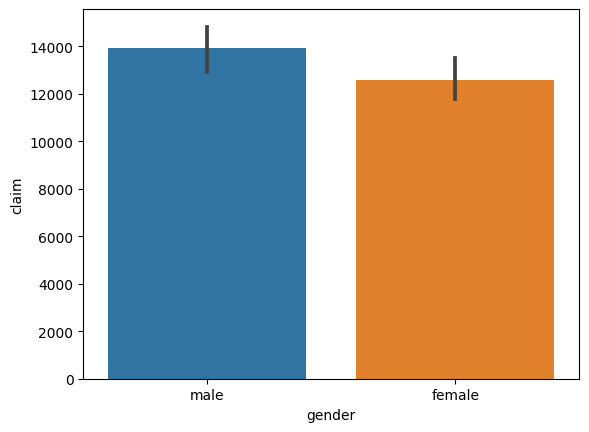

In [182]:
sns.barplot(y=df.claim,x=df.gender)

<Axes: xlabel='gender', ylabel='claim'>

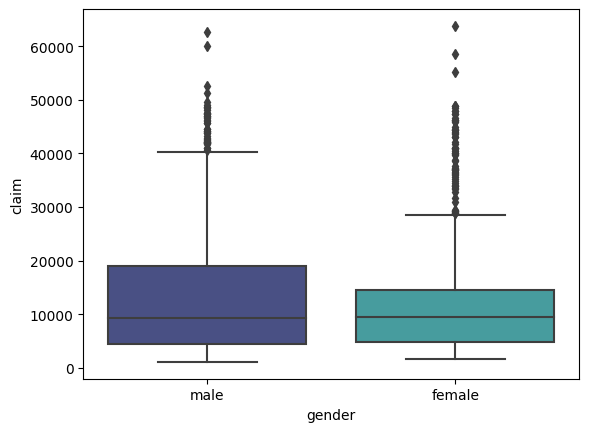

In [183]:
sns.boxplot(y=df.claim,x=df.gender,palette='mako')

In [184]:
px.bar(df,y=df.claim,x=df.gender,text='claim')

# claim vs bmi

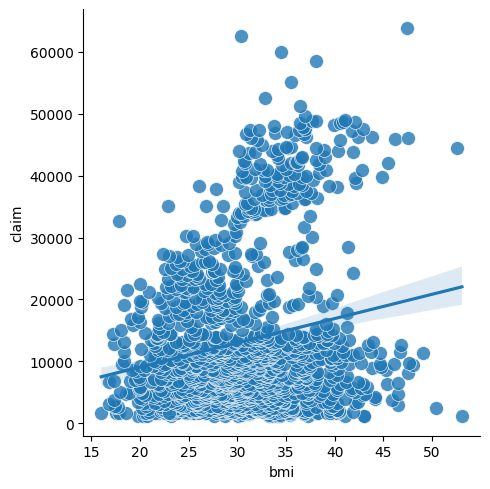

In [185]:
sns.lmplot(data=df,x='bmi',y='claim',scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'})

<Axes: xlabel='bmi', ylabel='claim'>

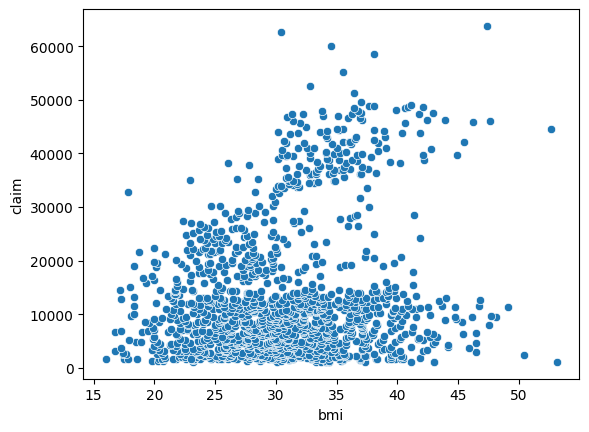

In [186]:
sns.scatterplot(data=df,x='bmi',y='claim')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='bmi', ylabel='claim'>

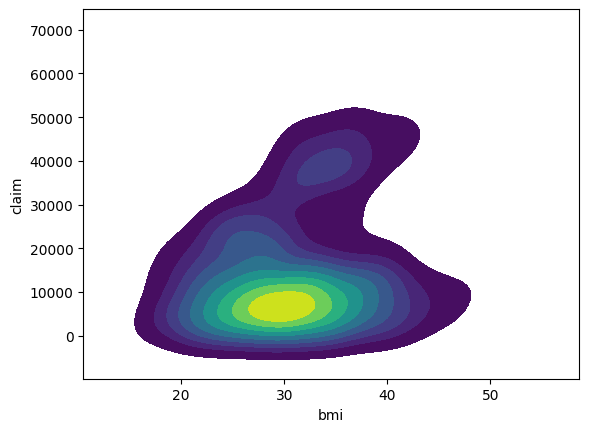

In [187]:
sns.kdeplot(data=df,x='bmi',y='claim', cmap='viridis', fill=True)

# claim vs bloodpressure

/tmp/ipykernel_33/1032245036.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='bloodpressure', ylabel='claim'>

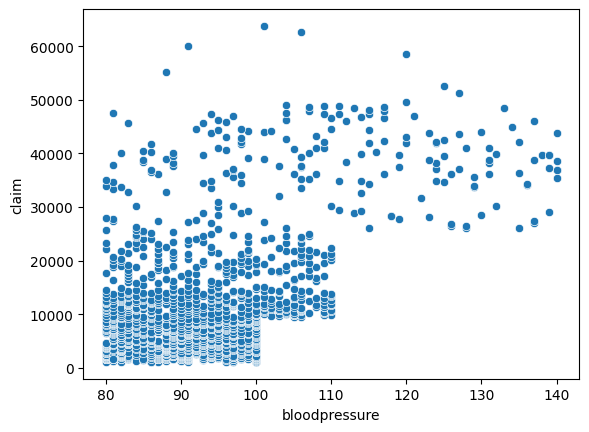

In [188]:
sns.scatterplot(data=df,x='bloodpressure',y='claim',palette='mako')

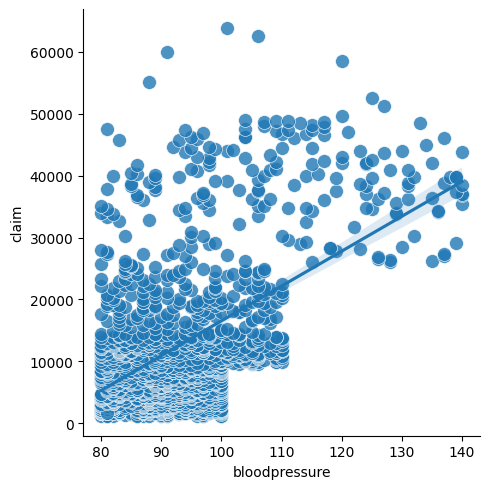

In [189]:
sns.lmplot(data=df,x='bloodpressure',y='claim',palette='mako',scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'})

In [190]:
import plotly.express as px
px.bar(df,x='bloodpressure',y='claim',color='diabetic')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# claim vs region

<Axes: xlabel='region', ylabel='claim'>

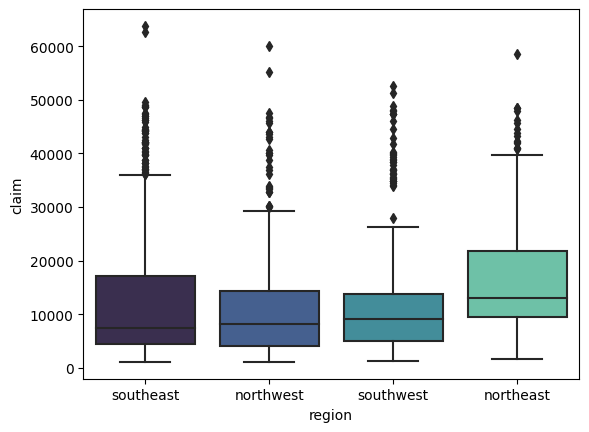

In [191]:
sns.boxplot(y=df.claim,x=df.region,palette='mako')

<Axes: xlabel='region', ylabel='claim'>

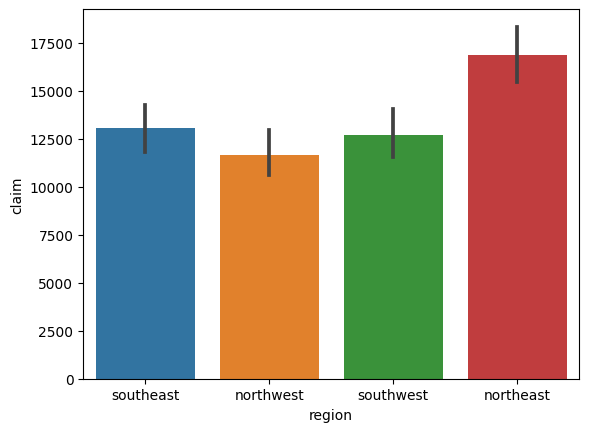

In [192]:
sns.barplot(x=df.region,y=df.claim)

# claim vs diabetic

<Axes: xlabel='diabetic', ylabel='claim'>

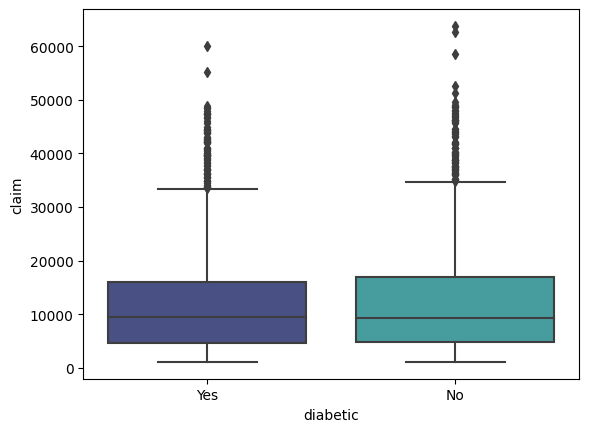

In [193]:
sns.boxplot(y=df.claim,x=df.diabetic,palette='mako')

<Axes: xlabel='diabetic', ylabel='claim'>

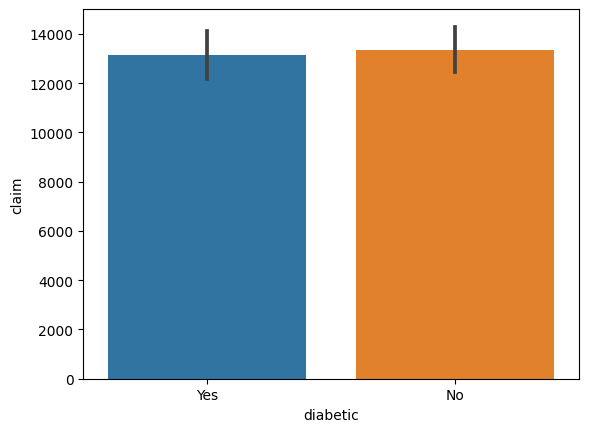

In [194]:
sns.barplot(y=df.claim,x=df.diabetic)

In [195]:
px.bar(df,y=df.claim,x=df.diabetic,text='claim')

# claim Vs smoker

In [196]:
px.bar(df,y=df.claim,x=df.smoker,text='claim')

<Axes: xlabel='smoker', ylabel='claim'>

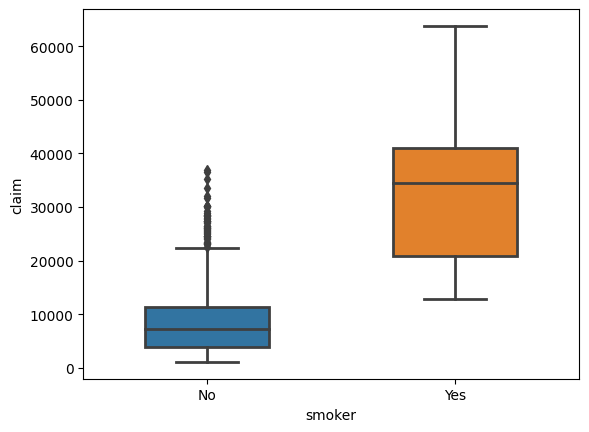

In [197]:
sns.boxplot(df,y=df.claim,x=df.smoker,width=0.5,linewidth=2)

<Axes: xlabel='smoker', ylabel='claim'>

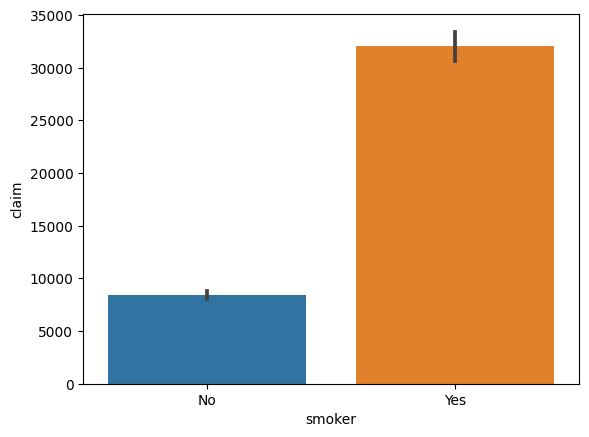

In [198]:
sns.barplot(df,y=df.claim,x=df.smoker)

# claim vs children

<Axes: xlabel='children', ylabel='claim'>

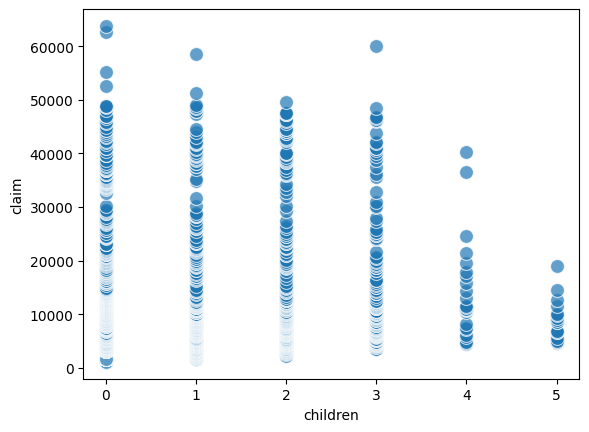

In [199]:
sns.scatterplot(data=df,x='children',y='claim',s=100,alpha=0.7,edgecolor='w')

In [200]:
px.bar(df,y='claim',x='children',text='claim')

# claim vs age and gender

In [228]:
px.violin(df,x='age',y='claim',box=True,points='all',hover_data=df.columns)

In [249]:
px.scatter(df,x='age',y='claim',color='gender_numeric',marginal_x='histogram',marginal_y='histogram',hover_data=df.columns)

# plot cliam over time

In [245]:
age_group=df.groupby('age')['claim'].sum().reset_index()
px.line(age_group,x='age',y='claim',title='Total Claim Amount by Age with Connected Lines',
              labels={'age': 'Age', 'claim': 'Total Claim Amount'},
              line_shape='vh')

In [201]:
# Assuming 'gender' is a categorical variable ('male', 'female')
df['gender_numeric'] = df['gender'].map({'male': 0, 'female': 1})


In [202]:
df.drop('gender',inplace=True,axis=1)

In [222]:
df.head()

,PatientID,age,bmi,bloodpressure,children,claim,gender_numeric,is_diabetic,is_smoker,northwest,southeast,southwest
index,,,,,,,,,,,,
0,1,39.0,23.2,91,0,1121.87,0,1,0,0,0,0
1,2,24.0,30.1,87,0,1131.51,0,0,0,0,0,0
2,3,NaN,33.3,82,0,1135.94,0,1,0,0,0,0
3,4,NaN,33.7,80,0,1136.40,0,0,0,1,1,1
4,5,NaN,34.1,100,0,1137.01,0,0,0,1,1,1


In [204]:
df['is_diabetic'] = df['diabetic'].map({'Yes': 1, 'No': 0})

In [205]:
df.drop('diabetic',inplace=True,axis=1)

In [206]:
df['is_smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})

In [207]:
df.drop('smoker',inplace=True,axis=1)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1339
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientID       1340 non-null   int64  
 1   age             1335 non-null   float64
 2   bmi             1340 non-null   float64
 3   bloodpressure   1340 non-null   int64  
 4   children        1340 non-null   int64  
 5   claim           1340 non-null   float64
 6   gender_numeric  1340 non-null   int64  
 7   is_diabetic     1340 non-null   int64  
 8   is_smoker       1340 non-null   int64  
 9   northwest       1340 non-null   int64  
 10  southeast       1340 non-null   int64  
 11  southwest       1340 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 168.4 KB


In [213]:
region= pd.get_dummies(df['region'],drop_first=True)
df = pd.concat([df, region], axis=1)

In [218]:
# df['northwest']=df['northwest'].astype('int')
df['southwest']=df['northwest'].astype('int')
df['southeast']=df['northwest'].astype('int')


In [221]:
df.drop('region',axis=1,inplace=True)

In [250]:
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim,gender_numeric,is_diabetic,is_smoker,northwest,southeast,southwest
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642,0.494030,0.479104,0.204478,0.260448,0.260448,0.260448
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288,0.500151,0.499750,0.403470,0.439043,0.439043,0.439043
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
df.corr()

,PatientID,age,bmi,bloodpressure,children,claim,gender_numeric,is_diabetic,is_smoker,northwest,southeast,southwest
PatientID,1.000000,-0.007492,0.115129,0.450602,0.128104,0.879268,-0.007235,-0.004460,0.663159,-0.085408,-0.085408,-0.085408
age,-0.007492,1.000000,-0.041955,-0.060325,-0.025547,-0.027909,0.393610,-0.026110,-0.031842,-0.019754,-0.019754,-0.019754
bmi,0.115129,-0.041955,1.000000,0.143544,0.012092,0.197401,-0.046812,-0.036969,0.003670,-0.136257,-0.136257,-0.136257
bloodpressure,0.450602,-0.060325,0.143544,1.000000,-0.031682,0.531341,-0.012437,-0.012689,0.418265,-0.061878,-0.061878,-0.061878
children,0.128104,-0.025547,0.012092,-0.031682,1.000000,0.069233,-0.015800,-0.014739,0.008355,-0.009252,-0.009252,-0.009252
claim,0.879268,-0.027909,0.197401,0.531341,0.069233,1.000000,-0.055766,-0.008725,0.787279,-0.077490,-0.077490,-0.077490
gender_numeric,-0.007235,0.393610,-0.046812,-0.012437,-0.015800,-0.055766,1.000000,0.017428,-0.075366,-0.028625,-0.028625,-0.028625
is_diabetic,-0.004460,-0.026110,-0.036969,-0.012689,-0.014739,-0.008725,0.017428,1.000000,0.017502,-0.034744,-0.034744,-0.034744
is_smoker,0.663159,-0.031842,0.003670,0.418265,0.008355,0.787279,-0.075366,0.017502,1.000000,-0.056337,-0.056337,-0.056337
northwest,-0.085408,-0.019754,-0.136257,-0.061878,-0.009252,-0.077490,-0.028625,-0.034744,-0.056337,1.000000,1.000000,1.000000


<Axes: title={'center': 'coorelation heatmap'}>

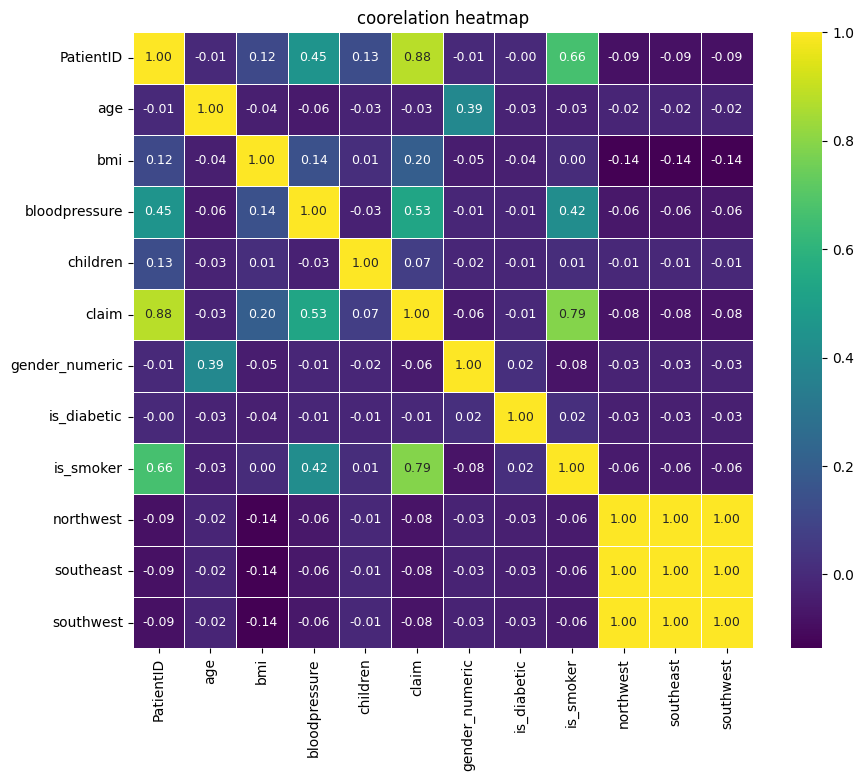

In [258]:
plt.figure(figsize=(10,8))
plt.title('coorelation heatmap')
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=0.5,cmap='viridis',annot_kws={'fontsize':9})

In [268]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# In this exploratory data analysis (EDA), we examined a dataset containing information about customer demographics and insurance claims. Key findings include:
- The dataset consists of 1000 observations and 8 features.
- Age and BMI exhibit right-skewed distributions, with most customers falling within the 30-50 age range.
- There is a moderate positive correlation between age and insurance claims amount (r = −0.0279), indicating that age and insurance claims amount are not meaningfully associated in a linear manner based on this correlation coefficient .
- Gender and smoking status show significant differences in claim amounts, with smokers generally having higher claims.
- Overall, this EDA provides valuable insights for further analysis and decision-making in the insurance domain.